In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score
from tqdm import tqdm

df = pd.read_csv("./progress_added.csv")

df["embedding"] = df["embedding"].apply(lambda x: np.array(eval(x), dtype=np.float32))

X = np.vstack(df["embedding"].values)
y = df["progress_label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# param_grid = {
#     "n_estimators": [100, 200, 300],
#     "max_depth": [None, 20, 40, 60],
#     "min_samples_split": [2,5, 10],
#     "max_features": [None, "sqrt", "log2"]
# }
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 20, 40, 60],
    "min_samples_split": [2,5, 10],
    "max_features": ["sqrt"]
}

grid = GridSearchCV(
    estimator = RandomForestRegressor(random_state=42),
    param_grid = param_grid,
    scoring = "neg_mean_absolute_error",
    cv = 3,
    verbose = 2,
    n_jobs = -1,
    error_score = "raise"
)

# regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# regressor.fit(X_train, y_train)

with tqdm(total=1, desc="Running GridSearchCV") as pbar:
    grid.fit(X_train, y_train)
    pbar.update(1)

print("Best Params:", grid.best_params_)
regressor = grid.best_estimator_

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absoltue Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Median Absolute Error: {medae:.4f}")
print(f"Explained Variance Score: {evs}")

Running GridSearchCV:   0%|                                                                                                 | 0/1 [00:00<?, ?it/s]

Fitting 3 folds for each of 36 candidates, totalling 108 fits


Running GridSearchCV: 100%|████████████████████████████████████████████████████████████████████████████████████████| 1/1 [03:10<00:00, 190.41s/it]

Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 0.0646
Mean Absoltue Error: 0.2190
R2 Score: 0.2093
Median Absolute Error: 0.2090
Explained Variance Score: 0.21209774602985354


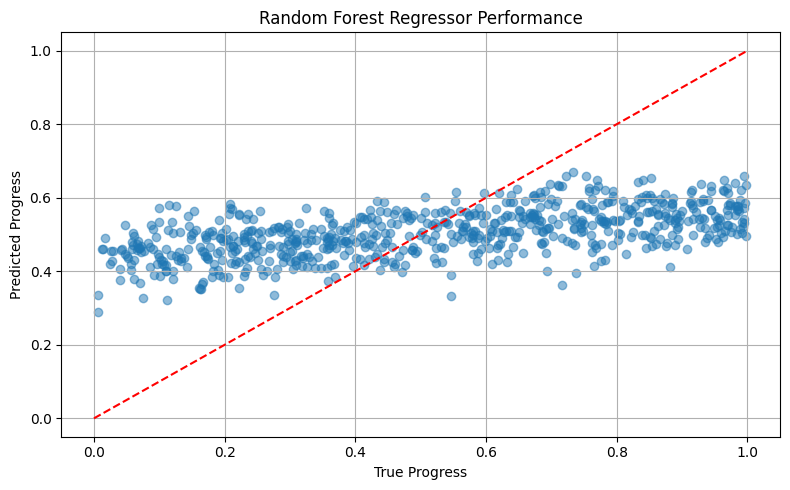

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("True Progress")
plt.ylabel("Predicted Progress")
plt.title("Random Forest Regressor Performance")
plt.grid(True)
plt.tight_layout()
plt.show()